In [20]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
data = mnist.data 

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
data_0 = data.values.reshape(-1,28,28)[:1,:,:].reshape(28,28)

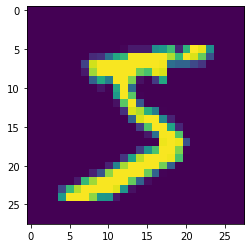

In [21]:
plt.imshow(data_0)

In [22]:
mnist.target[0]

'5'

In [25]:
mnist.target.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

# Data preparation

In [23]:
X,y = mnist.data, mnist.target

In [26]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [27]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [30]:
sgd_clf.predict(data_0.reshape(-1,784))

array(['3'], dtype='<U1')

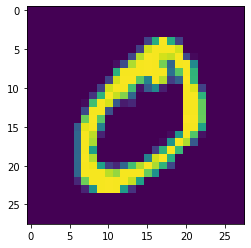

In [31]:
data_1 = data.values.reshape(-1,28,28)[1:2,:,:].reshape(28,28) 
plt.imshow(data_1)

In [32]:
mnist.target[1]

'0'

In [33]:
sgd_clf.predict(data_1.reshape(-1,784))

array(['0'], dtype='<U1')

# Evaluate

In [34]:
from sklearn.metrics import accuracy_score
pred_train = sgd_clf.predict(X_train)

In [35]:
pred_train.shape

(60000,)

In [36]:
print("Accuracy score on train : ",accuracy_score(y_train,pred_train))

Accuracy score on train :  0.8807666666666667


In [38]:
pred_test = sgd_clf.predict(X_test)
print("Accuracy score on test : ",accuracy_score(y_test,pred_test))

Accuracy score on test :  0.874


In [39]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [40]:
forest_clf.predict(data_0.reshape(-1,784))

array(['5'], dtype=object)

In [41]:
pred_train = forest_clf.predict(X_train)
print("Accuracy score on train : ",accuracy_score(y_train,pred_train))

pred_test = forest_clf.predict(X_test)
print("Accuracy score on test : ",accuracy_score(y_test,pred_test))

Accuracy score on train :  1.0
Accuracy score on test :  0.9705
